<a href="https://colab.research.google.com/github/Ashish-Tripathy/ComputerVision/blob/master/Asg_4_DNN_1st_Iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Architectural Highlights of this Iteration
1. For the First iteration, building the vanilla architecture, I will go wide until 128 filters but i will try to keep balance in making model wider
2. With my experience in EIP, I usually follow an incremental architecture to begin with. With every deeper block I go wider.
3. In the first convolution block i have convolution with 16, 32, 64 filters and in the Second convolution block I have 32, 64, 128 filters.
4. Moslty I will try to follow the similar architecture design with further iterations, but it might change based on choices to keep the parameters under 15k

# **Import Libraries and modules**

In [0]:

import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


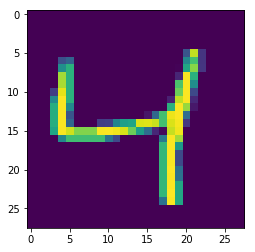

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# Building the Architecture


In [0]:
from keras.models import Model
from keras.layers import Input,Conv2D, BatchNormalization,Activation, Flatten

input = Input(shape=(28, 28, 1,))

#defining convolution block
def conv_block(inputs, filters,padding = 'valid'):
  conv = Conv2D(filters = filters, kernel_size = (3,3), padding=padding, use_bias=False)(inputs)
  conv = Activation('relu')(conv)
  return conv

#defining transition block
def bottleneck(inputs,filters):
  conv = Conv2D(filters = filters, kernel_size = (1,1), padding = 'valid', use_bias = False)(inputs)
  conv = Activation('relu')(conv)
  return MaxPooling2D()(conv)

#Building the architecture
First_Layer  =  conv_block(input, 16) #26 RF 3x3
Second_Layer =  conv_block(First_Layer,32) #24 RF 5x5
Third_Layer =  conv_block(Second_Layer,64) #22 RF 5x5
Transition_1 =  bottleneck(Third_Layer,32) #11 RF 7x7
Fourth_Layer  =  conv_block(Transition_1,32) #9 RF 14x14
Fifth_Layer =  conv_block(Fourth_Layer,64)  #7 RF 16x16 
Sixth_Layer =  conv_block(Fifth_Layer,128)  #5 RF 18x18 
last1x1      =  Conv2D(filters = 10, kernel_size = (1,1), padding = 'valid', use_bias = False)(Sixth_Layer)
last1x1      =  Activation('relu')(last1x1)
last_layer   =  Conv2D(filters = 10, kernel_size = (5,5), padding = 'valid', use_bias = False)(last1x1)#1, RF 22x22

#Flattening and softmax
flatten      =  Flatten()(last_layer)
output       =  Activation('softmax')(flatten)

#creating the model
model = Model(inputs=[input], outputs=[output])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        18432     
_________________________________________________________________
activation_12 (Activation)   (None, 22, 22, 64)        0         
__________

In [0]:
from keras.callbacks import *

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), nb_epoch = 20, verbose = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.1628 - acc: 0.9487 - val_loss: 0.0589 - val_acc: 0.9813
Epoch 2/20
60000/60000 [==============================] - 11s 182us/step - loss: 0.0543 - acc: 0.9833 - val_loss: 0.0357 - val_acc: 0.9886
Epoch 3/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0415 - acc: 0.9874 - val_loss: 0.0292 - val_acc: 0.9899
Epoch 4/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0320 - acc: 0.9902 - val_loss: 0.0313 - val_acc: 0.9904
Epoch 5/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0278 - acc: 0.9916 - val_loss: 0.0291 - val_acc: 0.9897
Epoch 6/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0222 - acc: 0.9930 - val_loss: 0.0345 - val_acc: 0.9897
Epoch 7/20
60000/60000 [==============================] - 10s 173us/step - loss: 0.0199 - acc: 0.9939 - val_loss: 0.

In [0]:
from keras.models import load_model
#modelPath = '/content/gdrive/My Drive/Colab Notebooks/1stDNNMnist_14thMay.hdf5'
#model = load_model(modelPath)

score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.029958125148670297, 0.9909]


# Observations
1. Got 99.32% validation accuracy, the best score, in the 19th epoch
2. Initial epochs underfit, but soon after some epochs we can see signs of overfitting and then the gap keeps increasing further
3. The architecture is much more complex than required. We can reduce the number of channels in the convolution blocks in the next iteration and then see if we are able to achieve similar accuracy.
